# Import Modules

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab 

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, SpectralEmbedding, TSNE, Isomap, LocallyLinearEmbedding

import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits import mplot3d

# Laod Data

In [2]:
X_coor, X_color = datasets.make_s_curve(n_samples=1500, random_state=42)

In [3]:
print ("Shape of X : ", X_coor.shape)
print ("Shape of color : ", X_color.shape)
print("X coordinates : ")
print(X_coor[:3])    # x,y,z coordinates
print("X color: ")
print(X_color)    # x,y,z coordinates

Shape of X :  (1500, 3)
Shape of color :  (1500,)
X coordinates : 
[[-0.92552951  1.03816357  0.6213245 ]
 [-0.89404266  0.95836376 -1.44798184]
 [ 0.81637223  0.05128413 -1.57752609]]
X color: 
[-1.18243152  4.24788226  2.18649139 ... -0.34406053 -1.13299233
  3.42433897]


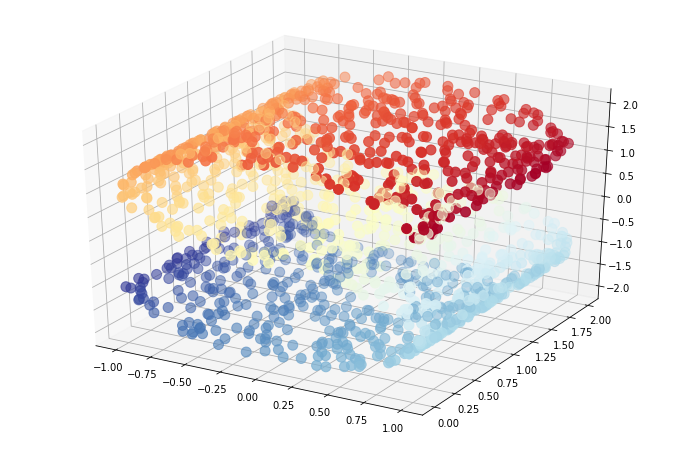

In [4]:
ax = plt.subplots(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_coor[:,0], X_coor[:,1], X_coor[:,2], c=X_color, cmap = plt.cm.RdYlBu, s=100)
plt.show()

# Modeling

In [5]:
def apply_manifold_learning(X, method):
    X = models[method].fit_transform(X)

    print(f'Method : {method}')

    plt.subplots(figsize=(8,6))
    plt.axis('equal')
    plt.scatter(X[:,0], X[:,1], c = X_color, cmap = plt.cm.RdYlBu)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]')
    plt.show()
    
    return method

In [6]:
models = {
    'non-Metric MDS' : MDS(n_components = 2, metric = False),   # take distances only as a reference for ranking
    'Metric MDS' : MDS(n_components = 2, metric = True),        # preserves distances between instances 
    'Spectral Embedding' : SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"),  # based on affinity matrix
    'TSNE' : TSNE(n_components = 2, init = 'pca', random_state = 0),    # widely used in visualizing clusters but very computational heavy
    'Isomap' : Isomap(n_neighbors = 15, n_components = 2),      # works well with curvy dataset
    'LLE' : LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'standard'), # preserves local relationship among data points – method: standard [light] vs hessian [heavy]
    'HLLE' : LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'hessian'),   

}

Method : non-Metric MDS


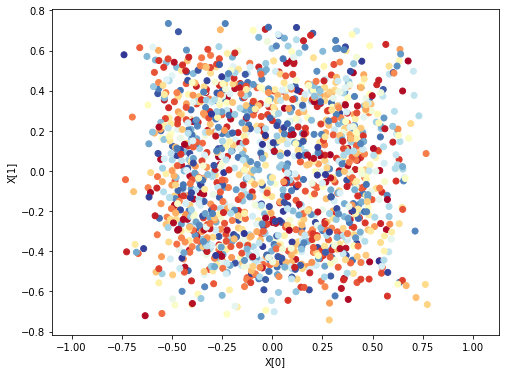

Method : Metric MDS


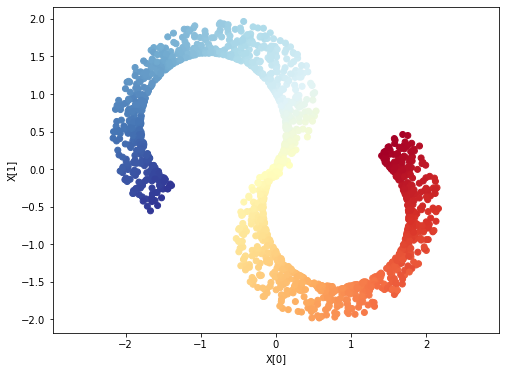

Method : Spectral Embedding


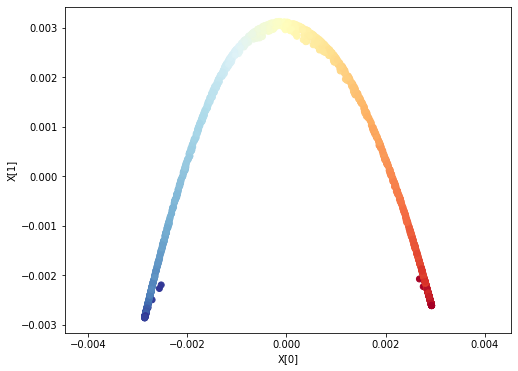

Method : TSNE


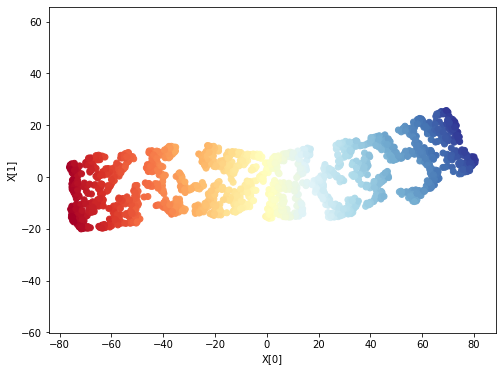

Method : Isomap


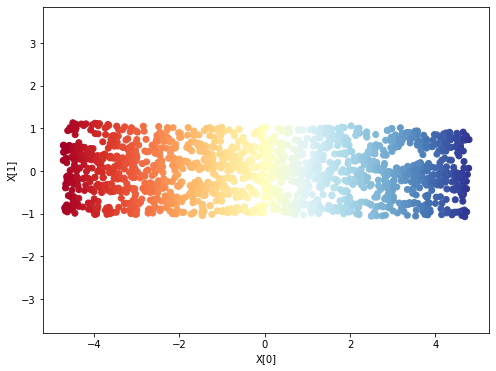

Method : LLE


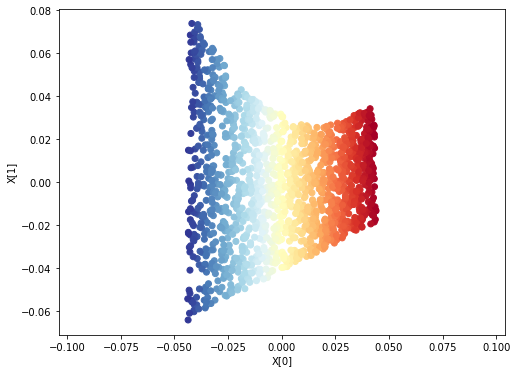

Method : HLLE


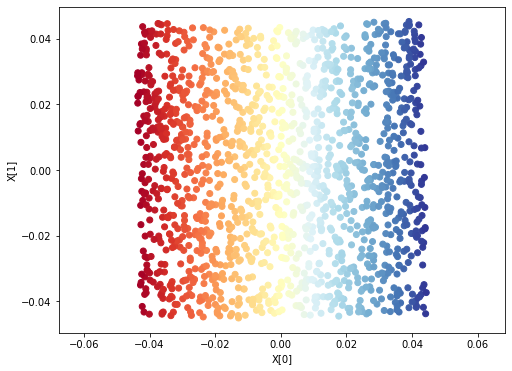

In [7]:
# 3D -> 2D, simplified to visualize result on graph
for model in models.keys():
    apply_manifold_learning(X_coor, model)

# Isomap & HLLE generate the best result with 2D in this case. 
# non-Metric MDS fails, others still have non-linearity to solve.

# Extra - Hand-Written Digit

Image tends to be spares as only minority of the pixels gets to describe the picture.<br>
Manifold learning can be appleid to reduce high dimensionailty (each pixel) to reduce the input size before being used by ML model.

In [51]:
data = datasets.load_digits()
print(data.DESCR[:660])
# 64 pixels/features (8x8)
# 5620 samples
# 10 targets (0 - 9 digits)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.



In [52]:
print(data.target[:20])
X = data.data
y = data.target

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


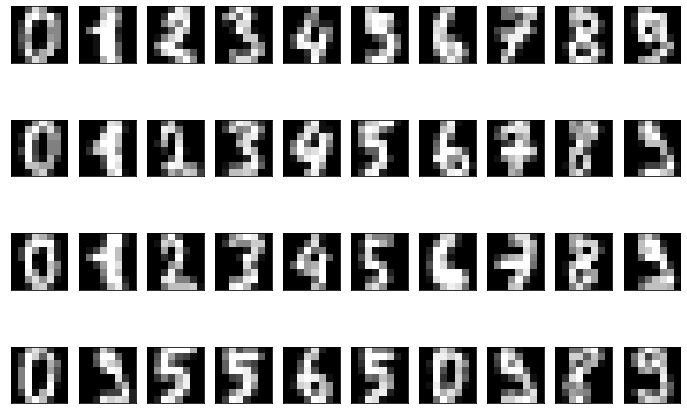

In [15]:
fig, axes = plt.subplots(4, 10, figsize = (12, 8), 
                         subplot_kw = dict(xticks = [], yticks = []))   # remove labels in axes

for i, ax in enumerate(axes.flat):
    ax.imshow( data.images[i], cmap = 'gray')

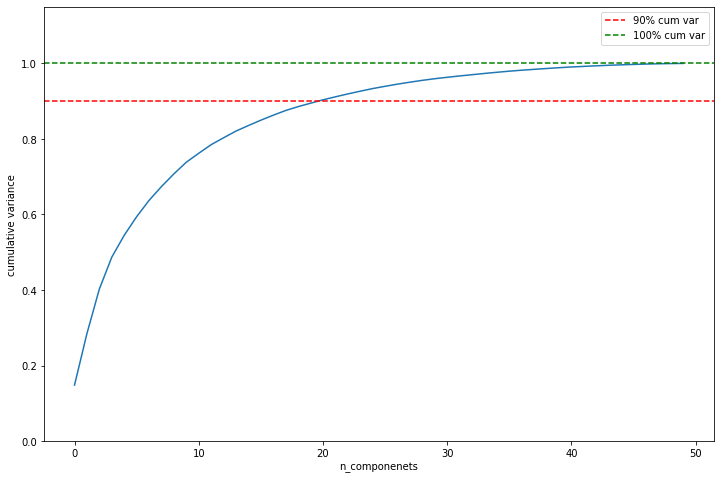

In [55]:
# Apply PCA to reduce dimensionality (background pixels does not contribute to digit recognition)
model = PCA(50).fit(X)  # 64D -> 50D

# Check how much information lost
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.axhline(y=0.9, color='r', linestyle='--', label='90% cum var')
plt.axhline(y=1, color='g', linestyle='--', label='100% cum var')

pylab.ylim([0, 1.15])
plt.xlabel('n_componenets')
plt.ylabel('cumulative variance')
plt.legend()
plt.show()

# 50D explains more than 90$ variance, very close to 100%

In [37]:
def apply_manifold_learning(X, y, method):
    X = models[method].fit_transform(X)

    print(f'Method : {method}')

    fix, axes = plt.subplots(figsize=(12,8))
    for i, target_name in zip(list(range(10)), data.target_names):
        plt.scatter(X[y==i,0], X[y==i,1],
                    label = target_name,
                    cmap = plt.cm.Spectral, s=100)

    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()
    
    return method

In [38]:
models = {
    'non-Metric MDS' : MDS(n_components = 2, metric = False, n_init = 1, max_iter = 100),
    'Metric MDS' : MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100),
    'Spectral Embedding' : SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"), 
    'TSNE' : TSNE(n_components = 2, init = 'pca', random_state = 0), 
    'Isomap' :  Isomap(n_neighbors = 30, n_components = 2),
    'LLE' : LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'standard'), 
    'MLLE' : LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'modified'),   # avoid data distortion at lower D while preserving spaces with neighbouring point as weightages
    'HLLE' : LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'hessian')     # try to achieve MLLE better but more computationally heavy
}

Method : non-Metric MDS


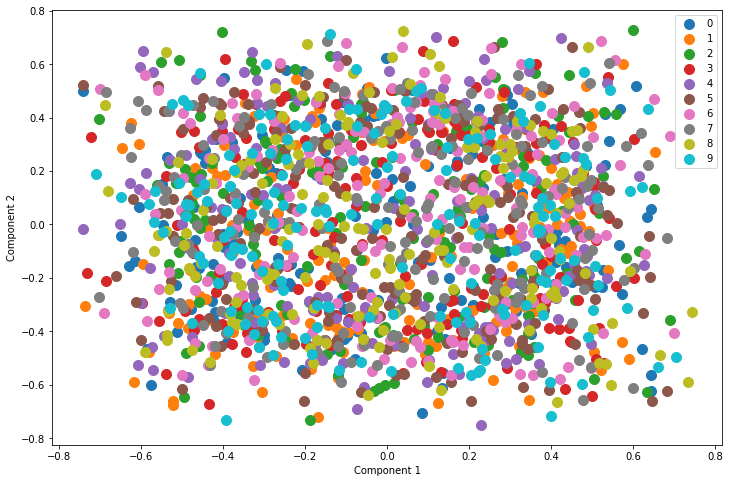

Method : Metric MDS


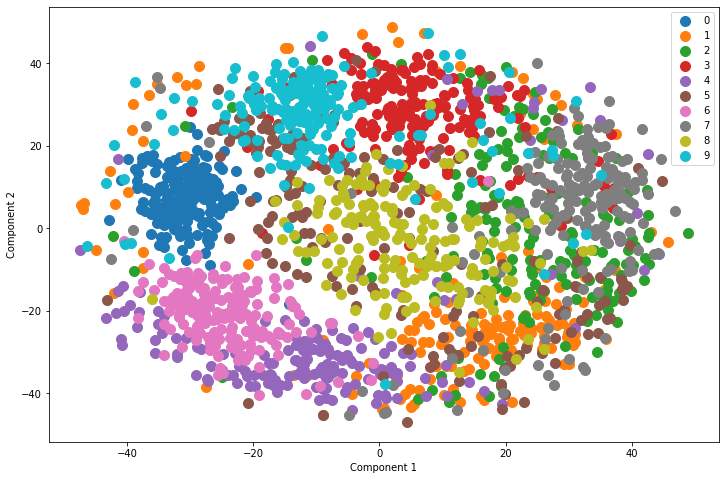

Method : Spectral Embedding


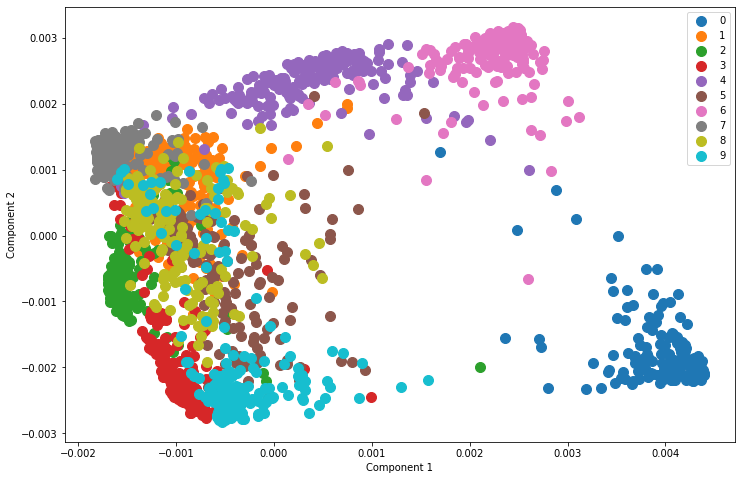

Method : TSNE


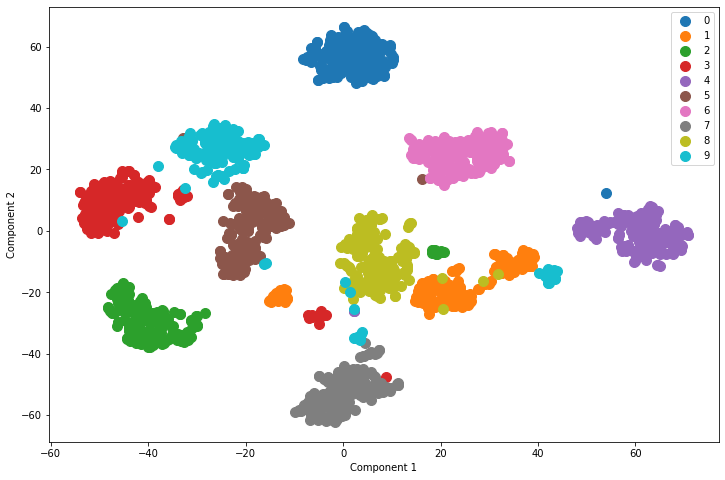

Method : Isomap


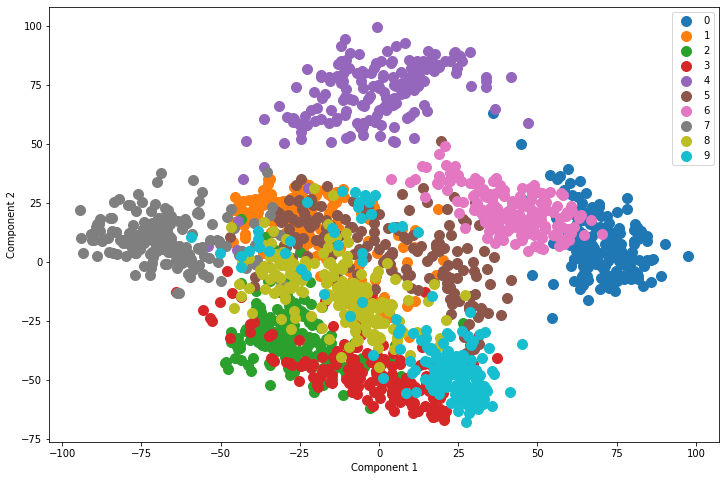

Method : LLE


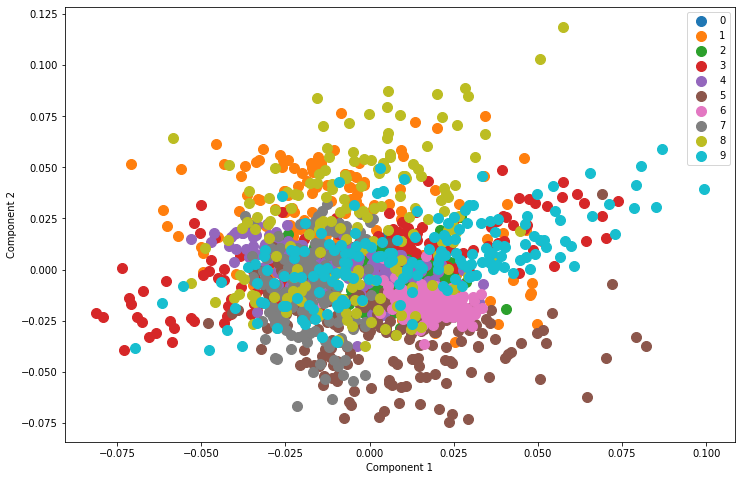

Method : MLLE


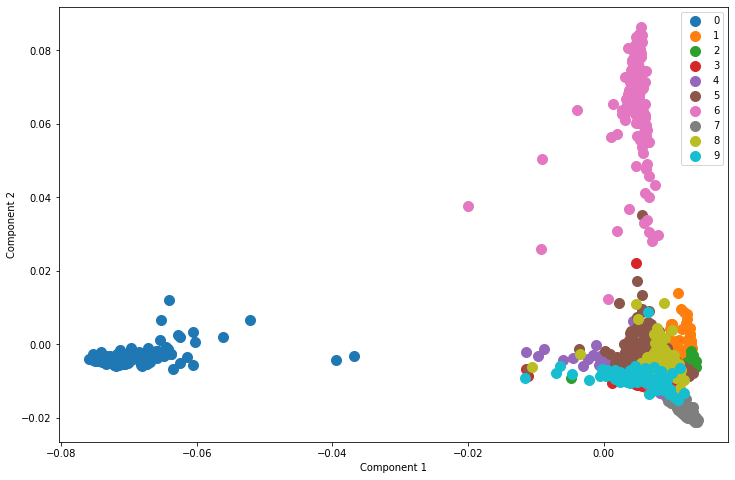

Method : HLLE


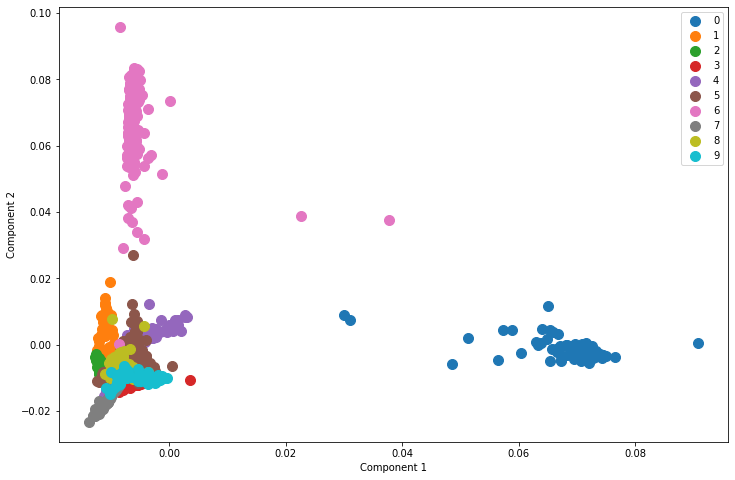

In [40]:
# 50D -> 2D, simplified to visualize result on graph
for model in models.keys():
    apply_manifold_learning(X, y, model)

# t-SNE distincts classes the best. 
# Isomap is good too but not as good as classes seem to be very close to one another which might overlap

# Extra - Faces

Image tends to be spares as only minority of the pixels gets to describe the picture.<br>
Manifold learning can be appleid to reduce high dimensionailty (each pixel) to reduce the input size before being used by ML model.

In [56]:
data = datasets.fetch_olivetti_faces()
print(data.DESCR)
# 4096 pixels/features  (64x64)
# 400 samples
# 40 targets/faces, each 10 samples

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [57]:
print(data.target[:20])
X = data.data
y = data.target

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


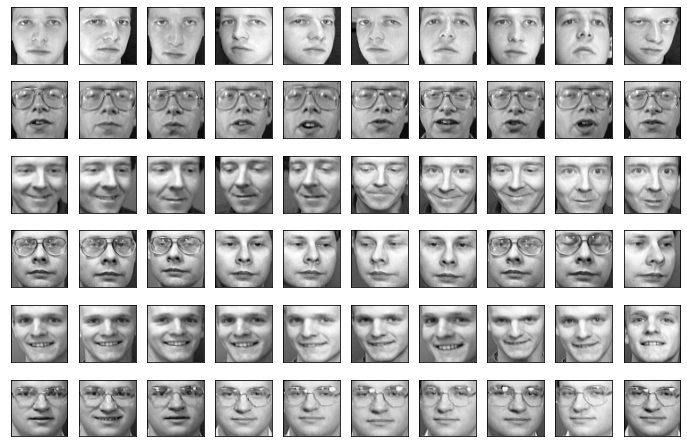

In [48]:
fig, axes = plt.subplots(6,10, figsize = (12, 8), 
                         subplot_kw = dict(xticks = [], yticks = []))   # remove labels in axes

for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap = 'gray')

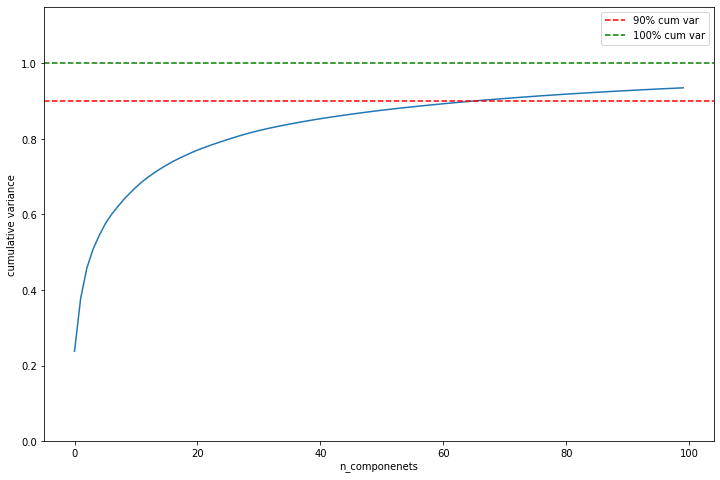

In [59]:
# Apply PCA to reduce dimensionality (background pixels does not contribute to digit recognition)
model = PCA(100).fit(X)  # 4096D -> 100D

# Check how much information lost
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.axhline(y=0.9, color='r', linestyle='--', label='90% cum var')
plt.axhline(y=1, color='g', linestyle='--', label='100% cum var')

pylab.ylim([0, 1.15])
plt.xlabel('n_componenets')
plt.ylabel('cumulative variance')
plt.legend()
plt.show()

# 50D explains more than 90$ variance

In [70]:
models = {
    'Metric MDS' : MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100),
    'Spectral Embedding' : SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"), 
    'TSNE' : TSNE(n_components = 2, init = 'pca', random_state = 0), 
    'Isomap' :  Isomap(n_neighbors = 30, n_components = 2),
    'LLE' : LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'standard'), 
    'HLLE' : LocallyLinearEmbedding(n_neighbors = 10, n_components = 2, method = 'hessian')
}

In [60]:
# to annotate image on data points
def plot_components(data, X_new, images = None, ax = None, thumb_frac = 0.05, cmap = 'gray'):
    
    # plot data points
    ax = ax or plt.gca()
    ax.plot(X_new[:, 0], X_new[:, 1], '.k')
    
    if images is not None:
        # check data point with already-displayed neighbours to avoid image overlapping/overloading
        min_dist = (thumb_frac * max( X_new.max(0) - X_new.min(0) )) ** 2
        shown_images = np.array( [2 * X_new.max(0)] )

        # plot image and boarders around
        for i in range(data.shape[0]):
            
            dist = np.sum((X_new[i] - shown_images) ** 2, 1)
            
            if np.min(dist) < min_dist:
                continue                            # don't show points that are too close
                
            shown_images = np.vstack([shown_images, X_new[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap = cmap), X_new[i])
            
            ax.add_artist(imagebox)

In [68]:
def apply_manifold_learning(X, method, show_scatter_plot=False):
    X_new = models[method].fit_transform(X)

    print(f'Method : {method}')

    if show_scatter_plot is not False:
        
        fig, ax = plt.subplots(figsize = (12, 10))
        ax.scatter(X_new[:, 0], X_new[:, 1], cmap = 'Spectral')
        plt.xlabel('X[0] after transformation')
        plt.ylabel('X[1] after transformation');
    
    fig, ax = plt.subplots(figsize = (12, 8))
    plot_components(X[:20,:], X_new[:20,:], images = data.images[:, ::2, ::2])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2');
    plt.show()
    
    return method

Method : Metric MDS


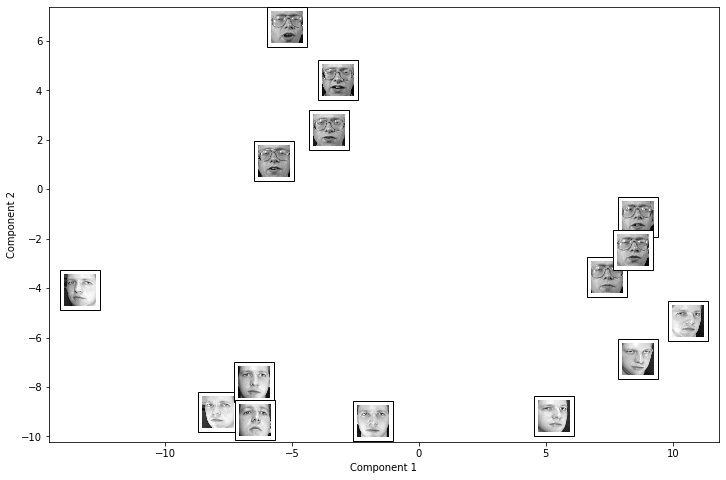

Method : Spectral Embedding


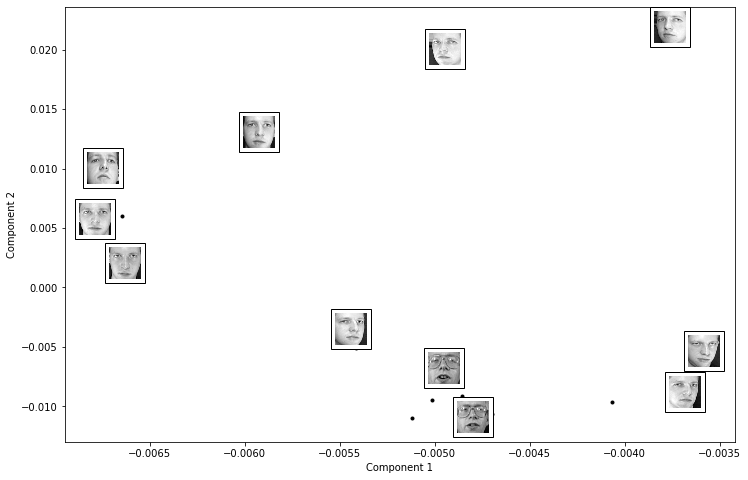

Method : TSNE


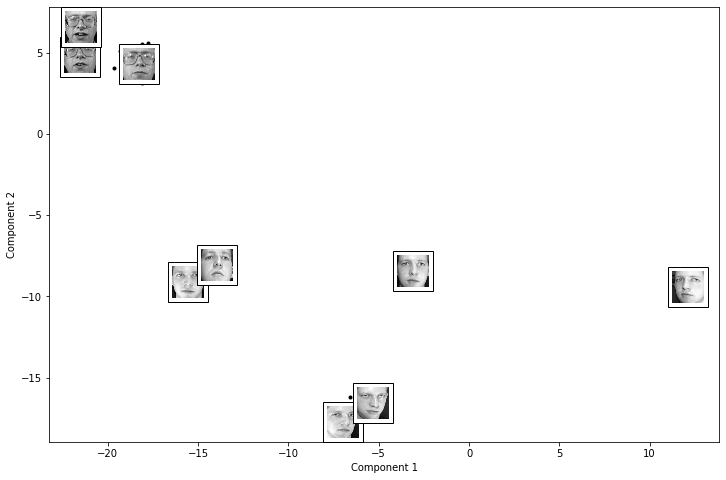

Method : Isomap


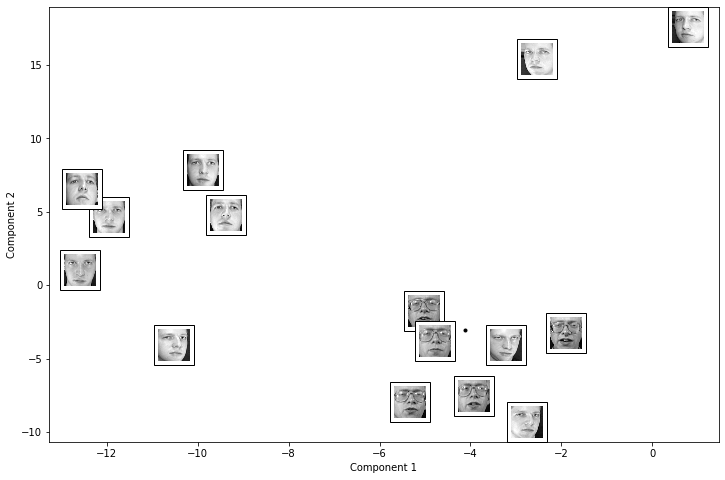

Method : LLE


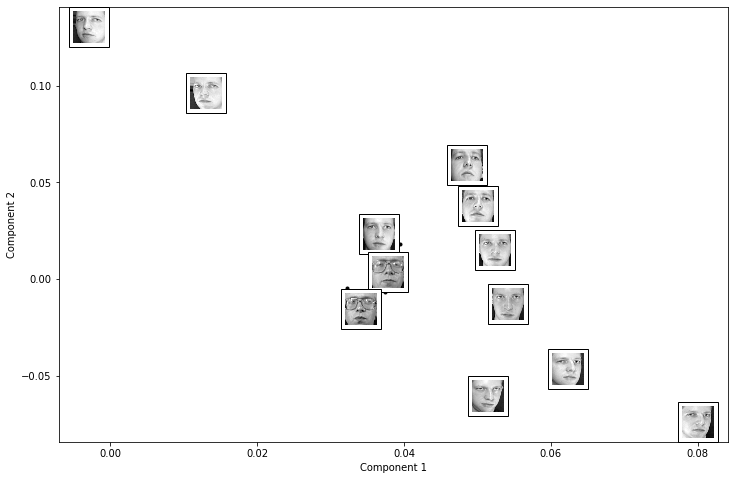

Method : HLLE


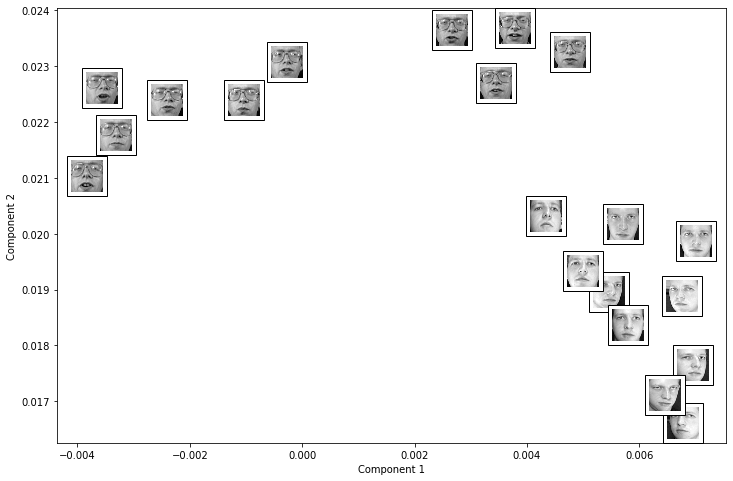

In [71]:
# 100D -> 2D, simplified to visualize result on graph
for model in models.keys():
    apply_manifold_learning(X, model, show_scatter_plot=False)

# Metric MDS seems distribute data by facial orientation & lighting
# Isomap manages to cluster same class with different facial orientation
# HLLE : seems to split classes better